# Relación entre las variables independientes

## Matriz de correlación

In [1]:
import os
import pandas as pd

def cargar_csv(nombre_archivo):
    """
    Carga un archivo CSV desde la ruta 'Resultados/Archivos_csv/Datos' en un DataFrame de pandas.

    Parámetros
    ----------
    nombre_archivo : str
        Nombre del archivo CSV a cargar.

    Retorna
    -------
    pd.DataFrame
        DataFrame con los datos cargados del archivo CSV.
    """
    # Construir la ruta completa
    ruta_archivo = os.path.join("..","Resultados", "Archivos_csv", "Datos", nombre_archivo)
    
    # Leer el CSV
    df = pd.read_csv(ruta_archivo, encoding="utf-8")
    print(f"Archivo '{ruta_archivo}' cargado correctamente.")
    
    return df


Archivo '..\Resultados\Archivos_csv\Datos\Tabla_modelos.csv' cargado correctamente.


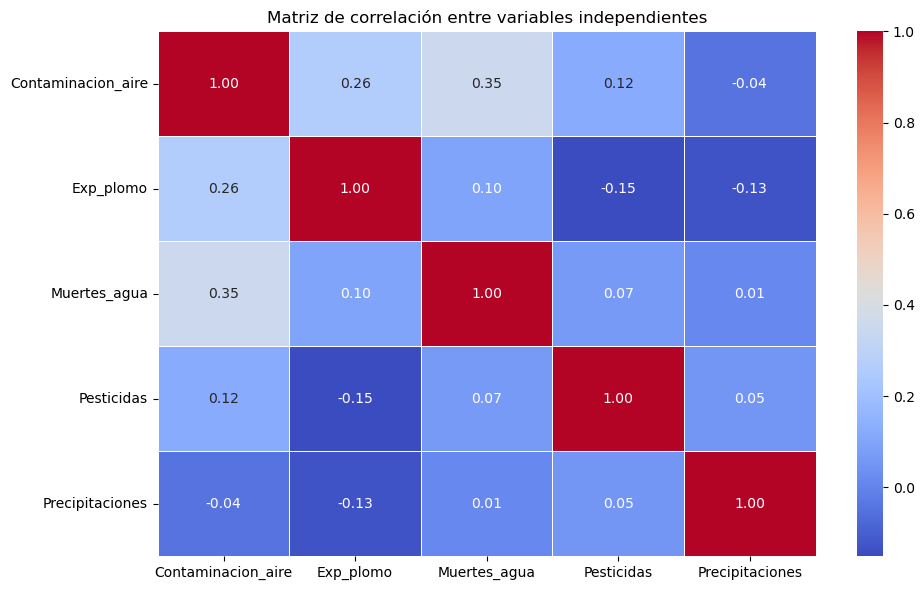

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# 1. CARGA DE DATOS
df = cargar_csv("Tabla_modelos.csv")


# 2. SELECCIÓN DE VARIABLES INDEPENDIENTES
variables_independientes = [
    'Contaminacion_aire',
    'Exp_plomo',
    'Muertes_agua',
    'Pesticidas',
    'Precipitaciones'
]


# 3. MATRIZ DE CORRELACIÓN
correlacion = df[variables_independientes].corr()

# Visualización con mapa de calor
plt.figure(figsize=(10, 6))
sns.heatmap(correlacion, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matriz de correlación entre variables independientes")
plt.tight_layout()
plt.show()

# Relación entre las variables independientes y la variable dependiente

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def analizar_relacion_con_parkinson(
    df_parkinson,
    df_variable,
    columna_variable,
    etiqueta_x,
    titulo_relacion,
    titulo_histograma,
    mostrar=True
):
    # Fusionar por Año y País
    df_relacion = df_parkinson.merge(df_variable, on=["Año", "País"], how="left")



    # 1️⃣ Scatter plot con regresión
    plt.figure(figsize=(12, 8))
    scatter = plt.scatter(
        df_relacion[columna_variable],
        df_relacion["Parkinson"],
        c=df_relacion["Año"],
        cmap="viridis",
        alpha=0.7
    )
    plt.colorbar(scatter, label="Año")
    plt.xlabel(etiqueta_x)
    plt.ylabel("Casos de Parkinson")
    plt.title(titulo_relacion)

    sns.regplot(
        x=columna_variable,
        y="Parkinson",
        data=df_relacion,
        scatter=False,
        lowess=True,
        color="red",
        line_kws={"linewidth": 2}
    )

    if mostrar:
        plt.show()
    plt.close()

    # 2️. Histograma de distribución
    plt.figure(figsize=(6, 4))
    sns.histplot(df_relacion[columna_variable], bins=30, kde=True)
    plt.xlabel(etiqueta_x)
    plt.title(titulo_histograma)

    if mostrar:
        plt.show()
    plt.close()

In [4]:
df_parkinson = cargar_csv("Datos_Parkinson.csv")
df_contaminacion = cargar_csv("Datos_contaminación_aire.csv")  # Tasa de contaminación
df_calidad_agua = cargar_csv("Datos_muertes_agua.csv")
df_plomo = cargar_csv("Datos_exp_plomo.csv")  # Tasa de carga de enfermedad por exposición al plomo
df_pesticidas = cargar_csv("Datos_uso_pepticidas.csv")  # Uso de pesticidas en toneladas
df_precipitaciones = cargar_csv("Datos_precipitaciones.csv")  # Precipitaciones en mm

Archivo '..\Resultados\Archivos_csv\Datos\Datos_Parkinson.csv' cargado correctamente.
Archivo '..\Resultados\Archivos_csv\Datos\Datos_contaminación_aire.csv' cargado correctamente.
Archivo '..\Resultados\Archivos_csv\Datos\Datos_muertes_agua.csv' cargado correctamente.
Archivo '..\Resultados\Archivos_csv\Datos\Datos_exp_plomo.csv' cargado correctamente.
Archivo '..\Resultados\Archivos_csv\Datos\Datos_uso_pepticidas.csv' cargado correctamente.
Archivo '..\Resultados\Archivos_csv\Datos\Datos_precipitaciones.csv' cargado correctamente.


## Parkinson y Contaminación de aire

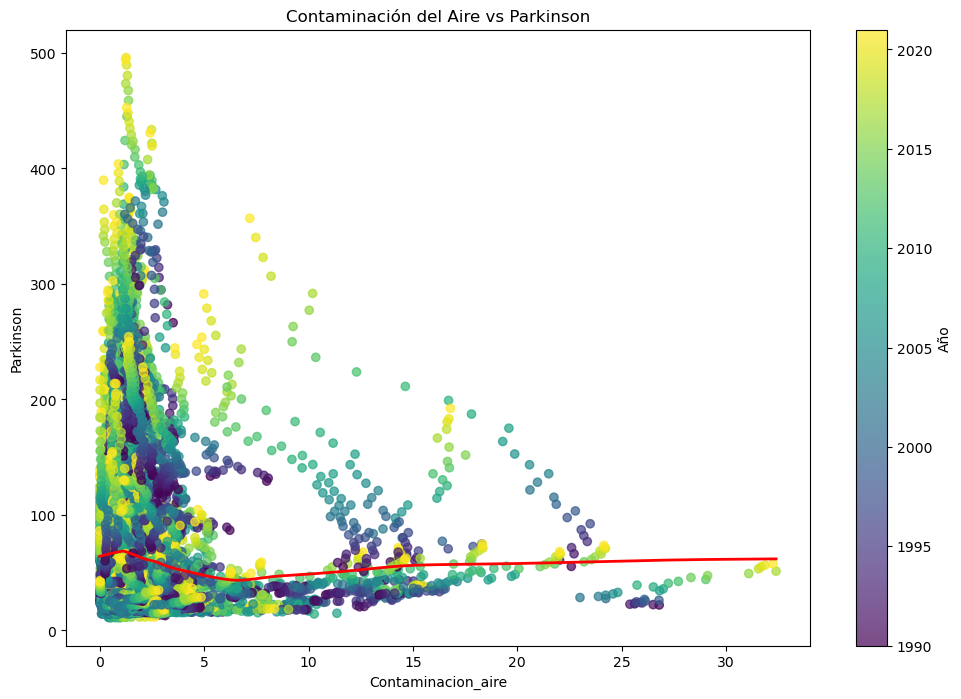

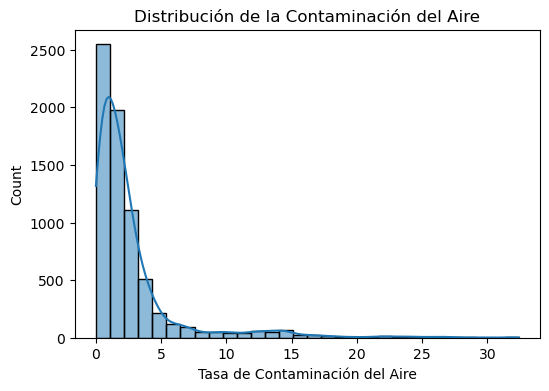

In [5]:
analizar_relacion_con_parkinson(
    df_parkinson,
    df_contaminacion,
    "Contaminacion_aire",
    "Tasa de Contaminación del Aire",
    "Contaminación del Aire vs Parkinson",
    "Distribución de la Contaminación del Aire"
)

## Parkinson y Muertes por Aguas Insalubres

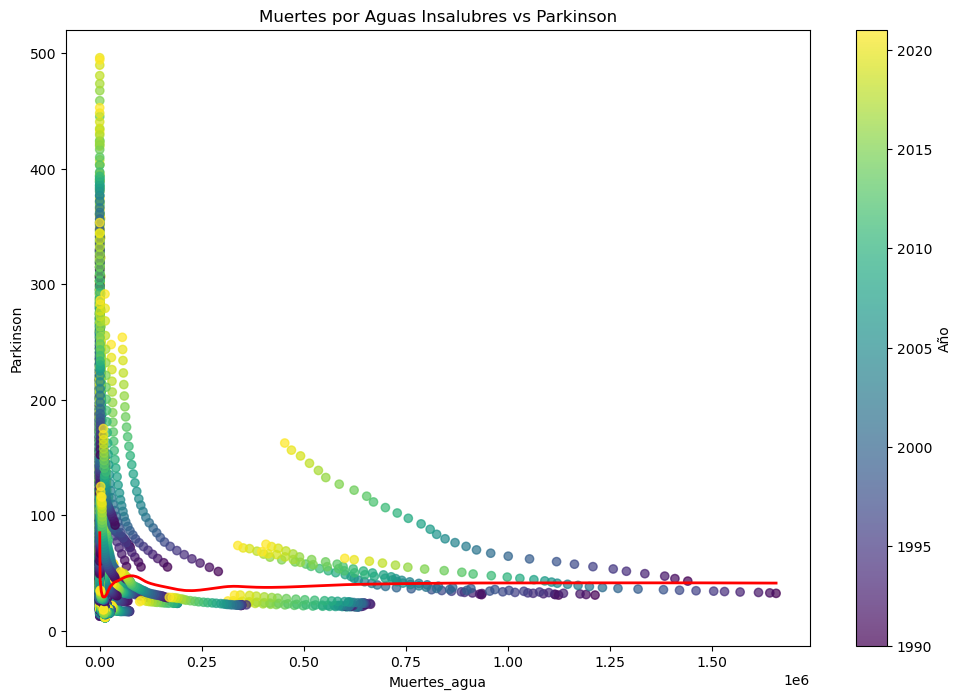

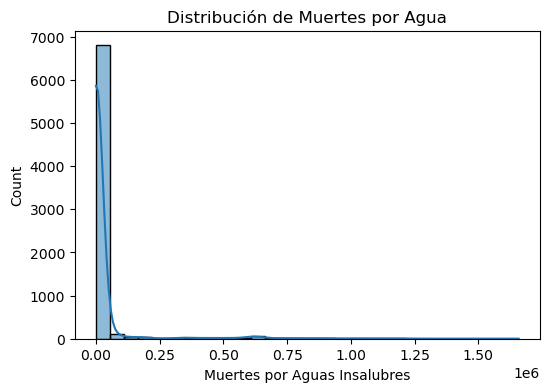

In [6]:
analizar_relacion_con_parkinson(
    df_parkinson,
    df_calidad_agua,
    "Muertes_agua",
    "Muertes por Aguas Insalubres",
    "Muertes por Aguas Insalubres vs Parkinson",
    "Distribución de Muertes por Agua"
)


## Parkinosn y Carga de enfermedad por exposición al plomo

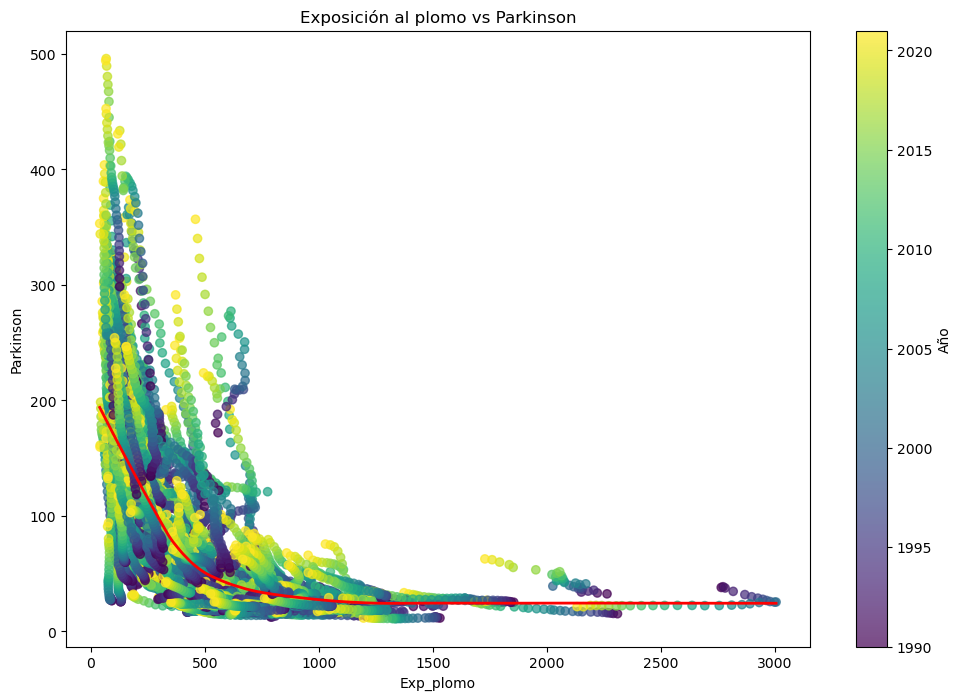

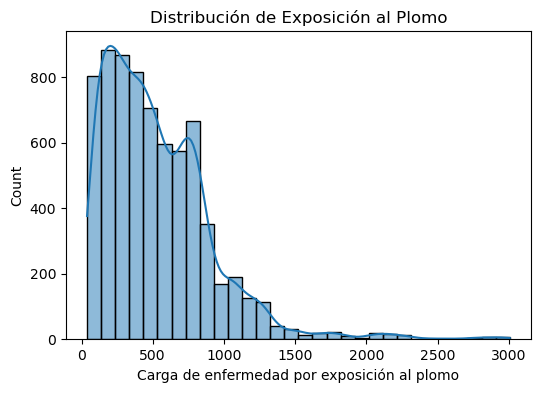

In [8]:
analizar_relacion_con_parkinson(
    df_parkinson,
    df_plomo,
    "Exp_plomo",
    "Carga de enfermedad por exposición al plomo",
    "Exposición al plomo vs Parkinson",
    "Distribución de Exposición al Plomo"
)

## Parkinson y Uso de Pesticidas

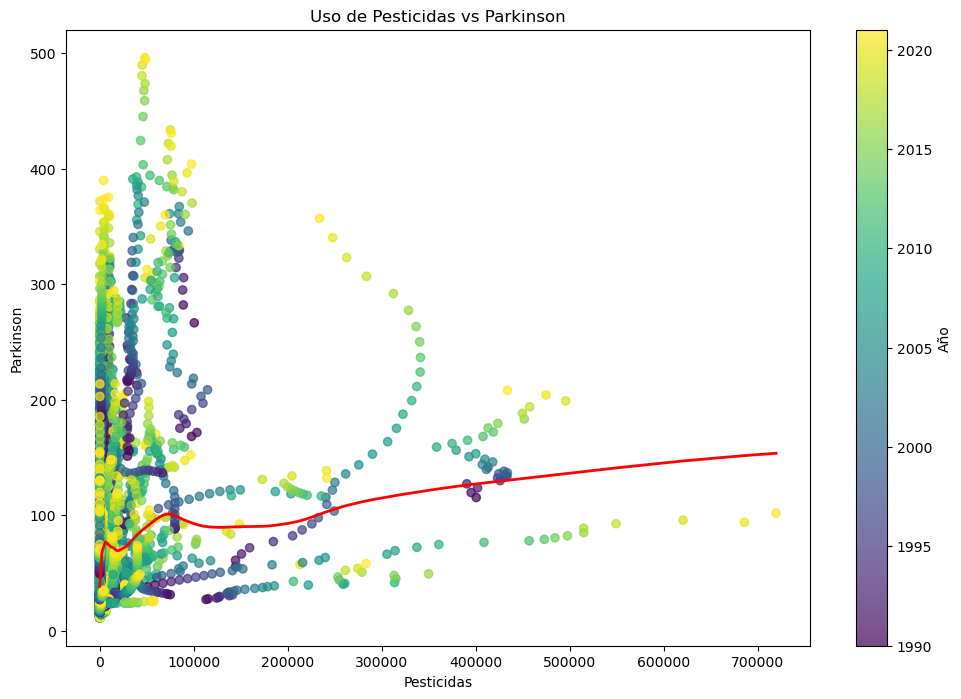

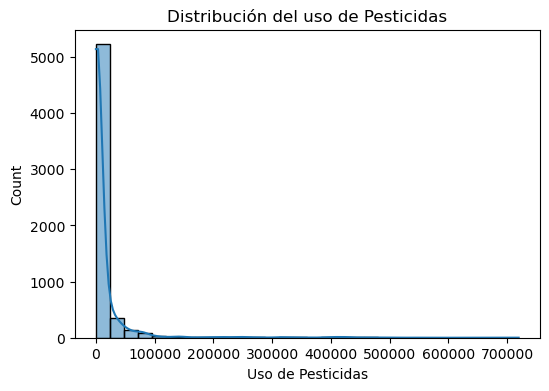

In [9]:
analizar_relacion_con_parkinson(
    df_parkinson,
    df_pesticidas,
    "Pesticidas",
    "Uso de Pesticidas",
    "Uso de Pesticidas vs Parkinson",
    "Distribución del uso de Pesticidas"
)

## Parkinson y Cantidad de precipitaciones

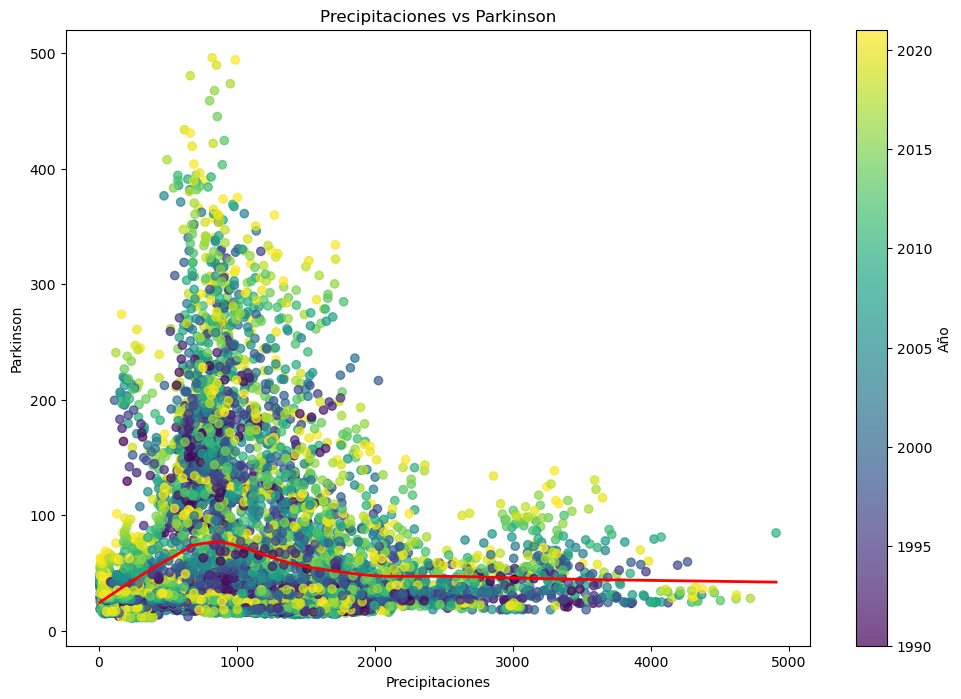

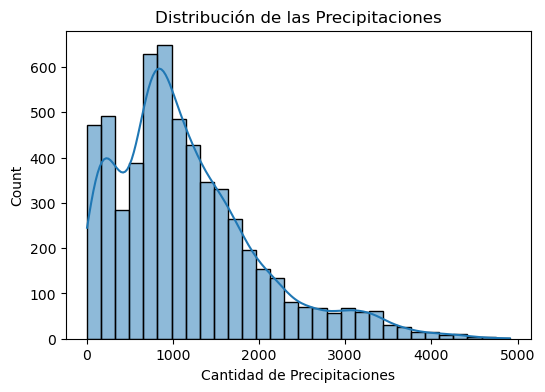

In [10]:
analizar_relacion_con_parkinson(
    df_parkinson,
    df_precipitaciones,
    "Precipitaciones",
    "Cantidad de Precipitaciones",
    "Precipitaciones vs Parkinson",
    "Distribución de las Precipitaciones"
)